Laplace Approximation of a univariant normal distribution

In [1]:
#Imports 
import torch
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
mean = 0
scale = 2

# Create a normal distribution object
def univariate_normal(mean, scale):
    return torch.distributions.Normal(mean, scale)

In [3]:
# Plot a distribution
def plot2d_distribution(dist):
    x = torch.linspace(-10, 10, 1000)
    y = torch.exp(dist.log_prob(x))
    plt.plot(x , y)
    plt.show()

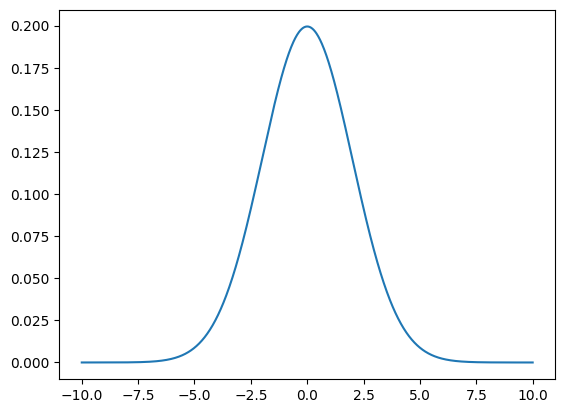

In [4]:
univariant_normal_dist = univariate_normal(mean, scale)
plot2d_distribution(univariant_normal_dist)

In [5]:
# Find mode of a 2d distribution
def find_mode(dist):
    x = torch.linspace(-10, 10, 10000)
    y = torch.exp(dist.log_prob(x))
    return x[y.argmax()].item()

mode_univariant_normal_dist = round(find_mode(univariant_normal_dist) , 2)
print(mode_univariant_normal_dist)

-0.0


In [6]:
# How gradient works in torch

x = torch.tensor(5. , requires_grad=True)    
y = torch.tensor(6. , requires_grad=True)

f = x**2 + y**2

f.backward()
print(x.grad)

tensor(10.)


In [7]:
# Finding the 2nd derviative of a univariant distribution at the mode
def find_2nd_derivative(dist, mode):
    x = torch.tensor(mode, requires_grad=True)
    f = dist.log_prob(x)
    f1 = torch.autograd.grad(f, x, create_graph=True)[0]
    f2 = torch.autograd.grad(f1, x, create_graph=True)[0]
    return f2.item()

second_derivative_univariant_normal_dist = find_2nd_derivative(univariant_normal_dist, mode_univariant_normal_dist)
print(second_derivative_univariant_normal_dist)

-0.25


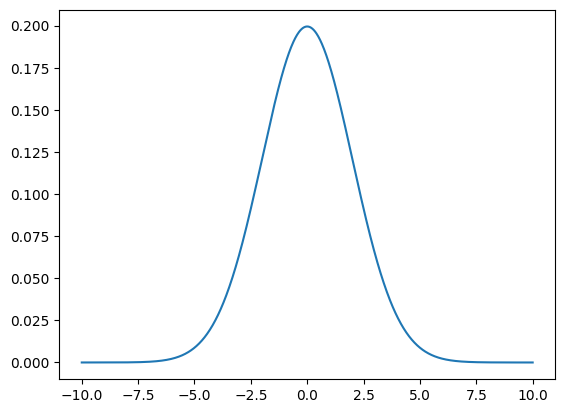

In [8]:
# Laplace Approximation for a univariant distribution

def laplace_approximation_univariant(dist):
    mode = find_mode(dist)
    second_derivative = find_2nd_derivative(dist, mode)
    return torch.distributions.Normal(torch.tensor(mode), torch.sqrt(torch.tensor(-1/second_derivative)))

laplace_approximation_univariant_normal_dist = laplace_approximation_univariant(univariant_normal_dist)
plot2d_distribution(laplace_approximation_univariant_normal_dist)

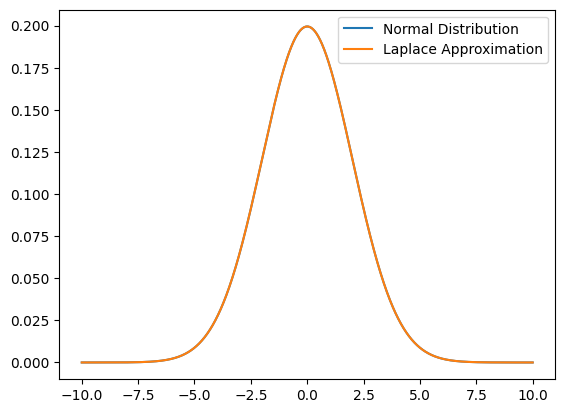

In [9]:
# Comparing the two distributions

x = torch.linspace(-10, 10, 1000)
y1 = torch.exp(univariant_normal_dist.log_prob(x))
y2 = torch.exp(laplace_approximation_univariant_normal_dist.log_prob(x))
plt.plot(x, y1, label='Normal Distribution')
plt.plot(x, y2, label='Laplace Approximation')
plt.legend()
plt.show()

In [10]:
# Create an interactive plot to see how the laplace approximation and the actual distribution changes with the mean and scale of the distribution

def univariant_normal_apporximation(mean, scale):
    normal_dist = univariate_normal(mean, scale)
    laplace_approximation_normal_dist = laplace_approximation_univariant(normal_dist)
    x = torch.linspace(-10, 10, 1000)
    y1 = torch.exp(normal_dist.log_prob(x))
    y2 = torch.exp(laplace_approximation_normal_dist.log_prob(x))
    plt.plot(x, y1, label='Normal Distribution')
    plt.plot(x, y2, label='Laplace Approximation')
    plt.legend()
    plt.show()

interact(univariant_normal_apporximation, mean=(-10, 10, 0.1), scale=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=0.0, description='mean', max=10.0, min=-10.0), FloatSlider(value=5.0, …

<function __main__.univariant_normal_apporximation(mean, scale)>

Laplace Approximation of a multivariant normal distribution with no cross terms

In [11]:
mean = torch.tensor([0., 0.])
cov = torch.tensor([[1., 0.], [0., 1.]])

def multivariant_normal(mean, cov):
    return torch.distributions.MultivariateNormal(mean, cov)

c:\Users\Inder\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


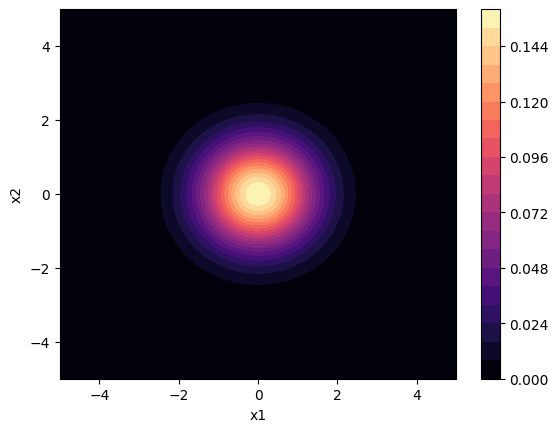

In [12]:
# Plot the contour plot of the multivariant distribution
def plot_contour(dist):
    x = torch.linspace(-5, 5, 1000)
    y = torch.linspace(-5, 5, 1000)
    X, Y = torch.meshgrid(x, y)
    XY = torch.stack([X, Y], dim=-1)
    Z = torch.exp(dist.log_prob(XY))
    plt.contourf(X, Y, Z , levels = 20 , cmap = 'magma')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.colorbar()
    plt.show()

multivariant_normal_dist = multivariant_normal(mean, cov)
plot_contour(multivariant_normal_dist)

In [13]:
# Find mode of a multivariant normal distribution
def find_mode_multivariant(dist):
    x = torch.tensor([0., 0.], requires_grad=True)
    f = -torch.exp(dist.log_prob(x))
    optimizer = torch.optim.Adam([x], lr=0.01)

    for i in range(1000):
        optimizer.zero_grad()
        f = -torch.exp(dist.log_prob(x))
        f.backward()
        optimizer.step()
        
    x = torch.round(x * 100) / 100
    return x.detach()

mode_multivariant_normal_dist = find_mode_multivariant(multivariant_normal_dist)
print(mode_multivariant_normal_dist)

tensor([0., 0.])


In [14]:
# Find the hessian of the multivariant distribution at the mode
def find_hessian(dist, mode):
    hessian = torch.autograd.functional.hessian(lambda x: -(dist.log_prob(x)), mode)
    return hessian

hessian = find_hessian(multivariant_normal_dist, mode_multivariant_normal_dist)
print(hessian)

tensor([[1., 0.],
        [0., 1.]])


In [15]:
# Take the inverse of the hessian
def inverse_hessian(hessian):
    return torch.inverse(hessian)

inverse_of_hessian = inverse_hessian(hessian)
print(inverse_of_hessian)

tensor([[1., 0.],
        [0., 1.]])


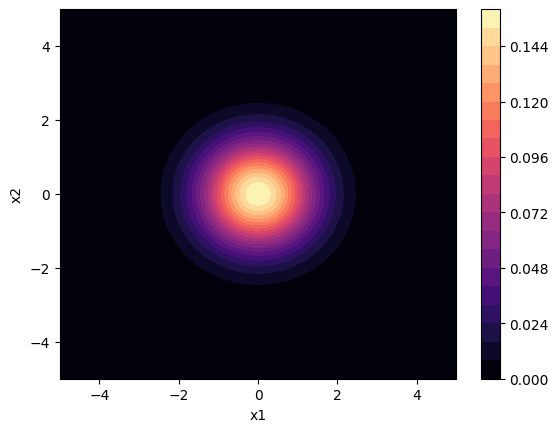

In [34]:
# Laplace Approximation for a multivariant distribution
def laplace_approximation_multivariant(dist):
    mode = find_mode_multivariant(dist)
    hessian = find_hessian(dist, mode)
    inverse_hessian = torch.inverse(hessian)
    return torch.distributions.MultivariateNormal(loc=mode, covariance_matrix=inverse_hessian)

laplace_approximation_multivariant_normal_dist = laplace_approximation_multivariant(multivariant_normal_dist)
plot_contour(laplace_approximation_multivariant_normal_dist)

In [17]:
# Comparing the two distributions/contour plots
def multivariant_normal_apporximation(mean1, mean2, cov1, cov2):
    mean = torch.tensor([mean1, mean2])
    cov = torch.tensor([[cov1, 0.], [0., cov2]])
    normal_dist = multivariant_normal(mean, cov)
    laplace_approximation_normal_dist = laplace_approximation_multivariant(normal_dist)
    # Plot the contour plots of the multivariant distributions on a single plot
    x = torch.linspace(-5, 5, 1000)
    y = torch.linspace(-5, 5, 1000)
    X, Y = torch.meshgrid(x, y)
    XY = torch.stack([X, Y], dim=-1)
    Z1 = torch.exp(normal_dist.log_prob(XY))
    Z2 = torch.exp(laplace_approximation_normal_dist.log_prob(XY))
    plt.contour(X, Y, Z1 , levels = 20 , cmap = 'Blues' )
    # Make the other contour plot dotted and add a color bar
    plt.contour(X, Y, Z2 , levels = 20 , cmap = 'Reds' , linestyles = 'dashed')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.text(-4.5, 4.5, 'Normal Distribution', color='blue')
    plt.text(-4.5, 4.2, 'Laplace Approximation', color='red')
    plt.show()

interact(multivariant_normal_apporximation, mean1=(-5, 5, 0.1), mean2=(-5, 5, 0.1), cov1=(0.1, 5, 0.1), cov2=(0.1, 5, 0.1))

interactive(children=(FloatSlider(value=0.0, description='mean1', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

<function __main__.multivariant_normal_apporximation(mean1, mean2, cov1, cov2)>

Laplace Approximation of a multivariant normal distribution with cross terms

In [18]:
mean = torch.tensor([0., 0.])
cov = torch.tensor([[1., 0.8], [0.8, 1.]])

def multivariant_normal_cross(mean, cov):
    return torch.distributions.MultivariateNormal(mean, cov)

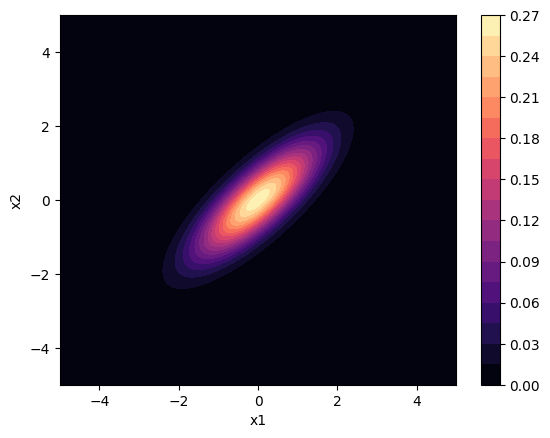

In [19]:
multivariant_normal_cross_dist = multivariant_normal_cross(mean, cov)
plot_contour(multivariant_normal_cross_dist)

In [20]:
mode_multivariant_normal_cross_dist = find_mode_multivariant(multivariant_normal_cross_dist)
print(mode_multivariant_normal_cross_dist)

tensor([0., 0.])


In [21]:
hessian_cross = find_hessian(multivariant_normal_cross_dist, mode_multivariant_normal_cross_dist)
print(hessian_cross)

tensor([[ 2.7778, -2.2222],
        [-2.2222,  2.7778]])


In [22]:
inverse_hessian_cross = inverse_hessian(hessian_cross)
print(inverse_hessian_cross)

tensor([[1.0000, 0.8000],
        [0.8000, 1.0000]])


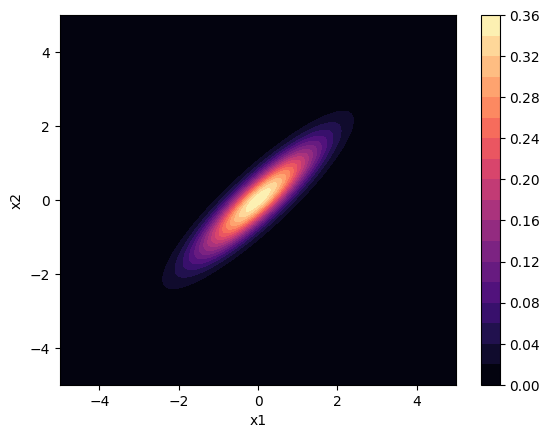

In [23]:
laplace_approximation_multivariant_normal_cross_dist = laplace_approximation_multivariant(multivariant_normal_cross_dist)
plot_contour(laplace_approximation_multivariant_normal_cross_dist)

In [35]:
# Comparing the two distributions/contour plots using the interactive plot
def multivariant_normal_cross_apporximation(mean1, mean2, cov1, cov2, cov3):
    mean = torch.tensor([mean1, mean2])
    cov = torch.tensor([[cov1, cov3], [cov3, cov2]])
    normal_dist = multivariant_normal_cross(mean, cov)
    laplace_approximation_normal_dist = laplace_approximation_multivariant(normal_dist)
    # Plot the contour plots of the multivariant distributions on a single plot
    x = torch.linspace(-5, 5, 1000)
    y = torch.linspace(-5, 5, 1000)
    X, Y = torch.meshgrid(x, y)
    XY = torch.stack([X, Y], dim=-1)
    Z1 = torch.exp(normal_dist.log_prob(XY))
    Z2 = torch.exp(laplace_approximation_normal_dist.log_prob(XY))
    plt.contour(X, Y, Z1 , levels = 20 , cmap = 'Blues' )
    # Print the cov of laplace_approximation_normal_dist on the title
    plt.title("Covariance = " + str(laplace_approximation_normal_dist.covariance_matrix))
    plt.contour(X, Y, Z2 , levels = 20 , cmap = 'Reds' , linestyles = 'dashed')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.text(-4.5, 4.5, 'Normal Distribution', color='blue')
    plt.text(-4.5, 4.2, 'Laplace Approximation', color='red')
    plt.show()

# The interactive plot for the multivariant distribution that starts with mean = 0,0 and cov = [[1, 0.8], [0.8, 1]]
interact(multivariant_normal_cross_apporximation, mean1=(-5, 5, 0.1), mean2=(-5, 5, 0.1), cov1=(0.1, 5, 0.1), cov2=(0.1, 5, 0.1), cov3=(-5, 5, 0.1))

interactive(children=(FloatSlider(value=0.0, description='mean1', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

<function __main__.multivariant_normal_cross_apporximation(mean1, mean2, cov1, cov2, cov3)>

Conclusions : Laplace Approximation is a good approximation for normal but the scale of the approximation is always too big compared to the true distribution. So, there might be a constant factor that we can use to scale the approximation to the true distribution.

Approximation of a beta distribution

In [25]:
alpha = torch.tensor(5)
beta = torch.tensor(5)

def beta_distribution(alpha, beta):
    return torch.distributions.Beta(alpha, beta)

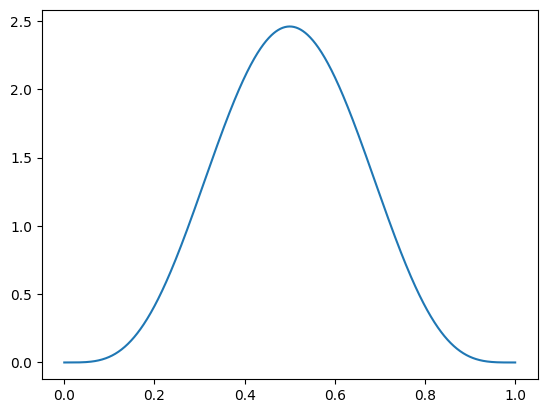

In [26]:
beta_dist = beta_distribution(alpha, beta)
def plot_beta(dist):
    x = torch.linspace(0, 1, 1000)
    y = torch.exp(dist.log_prob(x))
    plt.plot(x, y)
    plt.show()

plot_beta(beta_dist)

In [27]:
def find_mode_beta(dist):
    x = torch.linspace(0, 1, 10000)
    y = torch.exp(dist.log_prob(x))
    return x[y.argmax()].item()

mode_beta_dist = find_mode_beta(beta_dist)
print(mode_beta_dist)

0.49994999170303345


In [28]:
# Finding the 2nd derviative of a univariant distribution at the mode
def find_2nd_derivative_beta(dist, mode):
    x = torch.tensor(mode, requires_grad=True)
    f = (dist.log_prob(x))
    f1 = torch.autograd.grad(f, x, create_graph=True)[0]
    f2 = torch.autograd.grad(f1, x, create_graph=True)[0]
    return f2.item()

second_derivative_beta_dist = find_2nd_derivative_beta(beta_dist, mode_beta_dist)
print(second_derivative_beta_dist)

-32.0


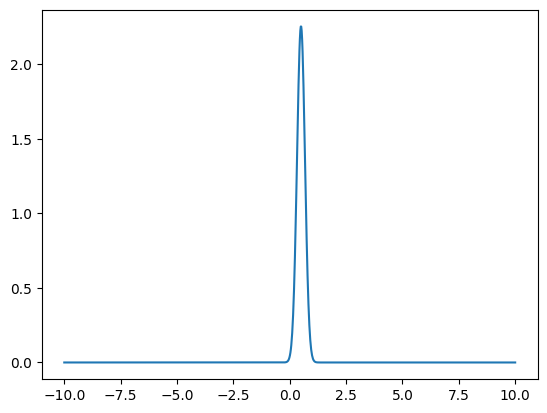

In [29]:
def laplace_approximation_beta(dist):
    mode = find_mode_beta(dist)
    second_derivative = find_2nd_derivative_beta(dist, mode)
    return torch.distributions.Normal(torch.tensor(mode), torch.sqrt(torch.tensor(-1/second_derivative)))

laplace_approximation_beta_dist = laplace_approximation_beta(beta_dist)
plot2d_distribution(laplace_approximation_beta_dist)

In [36]:
# Comparing the two distributions
def beta_apporximation(alpha, beta):
    beta_dist = beta_distribution(alpha, beta)
    laplace_approximation_beta_dist = laplace_approximation_beta(beta_dist)
    x = torch.linspace(0, 1, 1000)
    y1 = torch.exp(beta_dist.log_prob(x))
    y2 = torch.exp(laplace_approximation_beta_dist.log_prob(x))
    plt.plot(x, y1, label='Beta Distribution')
    plt.plot(x, y2, label='Laplace Approximation')
    plt.legend()
    plt.show()

def beta_apporximation_log(alpha, beta):
    beta_dist = beta_distribution(alpha, beta)
    laplace_approximation_beta_dist = laplace_approximation_beta(beta_dist)
    x = torch.linspace(0, 1, 1000)
    y1 = beta_dist.log_prob(x)
    y2 = laplace_approximation_beta_dist.log_prob(x)
    plt.plot(x, y1, label='Beta Distribution')
    plt.plot(x, y2, label='Laplace Approximation')
    plt.legend()
    plt.show()    

interact(beta_apporximation_log, alpha=(0.1, 10, 0.1), beta=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=0.1), FloatSlider(value=5.0, d…

<function __main__.beta_apporximation_log(alpha, beta)>

Here, we need to scale down laplace approximation by some constant factor to get a good approximation of the true distribution.